# Módulo: Aprendizaje Supervisado
## Regresión Ridge
## Regresión logística

# Objetivos de la clase
- Comprender el concepto de regularización aplicando la regresión Ridge
- Conocer y analizar el método de regresión para tareas de clasificación
- Aprender la puntuación de desempeño de exactitud para clasificadores

# Regularización
La regularización es una manera de evitar el sobreajuste de los modelos

<br><center>
    <img src="figures/regular-1.png" width="700"/>
</center>

- En un modelo sobreajustado habrán algunos pesos con gran preponderancia por sobre otros
- Esto ocurre ya que se está "forzando" a parte del modelo a ajustarse a ciertos datos
- Ejemplo:

<center>
    <img src="figures/regular-2.png" width="600"/>
</center>

- Una manera de evitar esto es "penalizando" la ocurrencia de pesos grandes


# Regresión Ridge


## Motivación
- Un inconveniente de los mínimos cuadrados es su tendencia a tener un error de varianza grande, ya que el modelo trata de ajustarse a datos lejanos (outliers) porque estos suben mucho el error (o costo)

<center>
    <img src="figures/outliers-1.png" width="500"/>
</center>

- Esto se puede enfrentar con **regularización**, lo que consiste en penalizar pesos $w_{j}$ grandes para que el modelo mantenga generalidad y no sufra overfitting

## Formulación

- Para la regresión lineal del tipo Ridge se usa la siguiente función de costo modificada:

\begin{split}
S(w) = \sum_{i=1}^{m} \left( y_{i} - \sum_{j=1}^{n} \left( w_{0} + w_{j} x_{ij} \right) \right)^{2} + \alpha \sum_{j=1}^{n} w_{j}^{2}
\end{split}

- La optimización de los pesos $w_{j}$ resulta más compleja y pueden usarse otros métodos como gradiente descendente o Cholesky para su cálculo (ya no sirve la matriz pseudoinversa)

## Regresion Ridge en Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

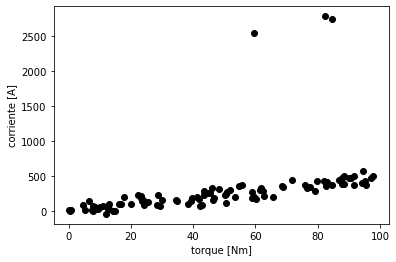

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def generate_dataset_ridge(beta, n, std_dev): #funcion para  crear datos al azar pseudo-lineales
    np.random.seed(23)
    X = np.random.rand(n)*100.
    e = np.random.randn(n) * std_dev
    y = X * beta + e
    y[int(n/3)] = y[int(n/3)]*8 #algunos puntos se agrandan artificialmente
    y[int(n/6)] = y[int(n/6)]*8
    y[int(n/5)] = y[int(n/5)]*8
    return np.reshape(X, (len(X), 1)), y

beta = 4.8
n = 100
std_dev=57.
X, y = generate_dataset_ridge(beta, n, std_dev) #se genera el conjunto de datos
plt.scatter(X, y, label='dataset', color='black') #grafico de dispersion
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]') #etiquetas de los ejes, plt.legend()
plt.show()

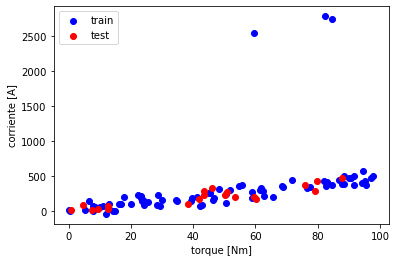

In [31]:
X_train = X[:-20] #atributos para entrenamiento
X_test = X[-20:] #atributos para test

y_train = y[:-20] #target para entrenamiento
y_test = y[-20:] #target para test

plt.scatter(X_train, y_train, label='train', color='blue')
plt.scatter(X_test, y_test, label='test', color='red')
plt.xlabel('torque [Nm]'), plt.ylabel('corriente [A]'), plt.legend()
plt.show() #mostrar legenda y graficar

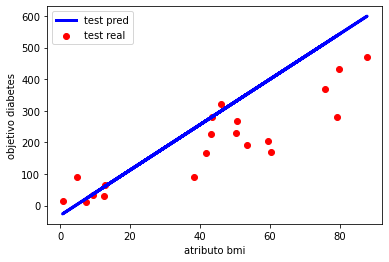

MSE de test =  14724.40109071561
Pesos =  [7.18044944]


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regre = LinearRegression() 
regre.fit(X_train, y_train)
y_test_pred = regre.predict(X_test)

plt.scatter(X_test, y_test, color="red", label='test real')
plt.plot(X_test, y_test_pred, color="blue", label='test pred', linewidth=3)
plt.xlabel('atributo bmi'), plt.ylabel('objetivo diabetes'), plt.legend()
plt.show()
print('MSE de test = ', mean_squared_error(y_test_pred, y_test))
print("Pesos = ", regre.coef_)


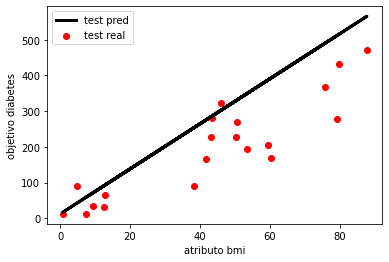

MSE =  12996.254804952832
Pesos =  [6.3079652]


In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10000., solver='lsqr')
ridge.fit(X_train, y_train)
y_test_pred2 = ridge.predict(X_test)

plt.scatter(X_test, y_test, color="red", label='test real')
plt.plot(X_test, y_test_pred2, color="black", label='test pred', linewidth=3)
plt.xlabel('atributo bmi'), plt.ylabel('objetivo diabetes'), plt.legend()
plt.show()
print('MSE = ', mean_squared_error(y_test_pred2, y_test))
print("Pesos = ", ridge.coef_)

# Ejemplo "Diabetes" 

- Construir modelo de regresión Ridge
- Comparación con modelo de regresión lineal por mínimos cuadrados

<center>
    <img src="figures/diabetes.png" width="400"/>
</center>

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes


In [34]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True, as_frame=True) #cargamos dataset con atributos "X" y target "y"
X.insert(10, "target", y)
display(X) #set de datos

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [35]:
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=100.0, solver='lsqr')
ridge.fit(X_train, y_train)
y_train_predict = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

y_test_predict = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_test)


el error de entrenamiento es MSE =  6028.191472773466
el error de test es MSE =  5318.483587658886


In [36]:
#minimos cuadrados ordinarios
from sklearn.linear_model import LinearRegression

#entrenamiento del modelo
squares = LinearRegression()
squares.fit(X_train, y_train)
y_train_predict = squares.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

#test del modelo
y_test_predict = squares.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_test)

el error de entrenamiento es MSE =  2924.041678907289
el error de test es MSE =  2821.7385595843766


**Reflexión: ¿por qué los errores de la regresión Ridge están dando más grande que los errores de mínimos cuadrados?**

# Regresión logística

## Motivación

- Considerar el siguiente conjunto de datos para un motor:

Muestra | RPM | Torque kNm | ... | Corriente A | Falla
- | - | - | - | - | - 
1 | 1500 | 890 | ... | 15.1 | 0
2 | 1450 | 900 | ... | 12.7 | 1
... | ... | ... | ... | ... | ...
m | 1480 | 920 | ... | 17.1 | 0

- Con un modelo lineal basado en regresión logística se podría estimar si existe una falla en la operación
- En este caso RPM, Torque y Corriente serían atributos y Falla sería la variable objetivo binaria

## Formulación

- La idea es transformar la regresión lineal en un modelo de clasificación usando la función logística.

<center>
    <img src="figures/logistic-1.png" width="600"/>
</center>

- Función logística:

\begin{split}
    \phi(z) = \frac{1}{1 + e^{-z}}
\end{split}


- Gráfico de función logística:

<center>
    <img src="figures/sigmoid.png" width="300"/>
</center>

- El modelo entonces queda de la forma:

\begin{split}
\hat{y}(w) = \frac{1}{1 + e^{-w_0 - w_1 x_1 - ... - w_m x_m}}
\end{split}

- Así, los valores predichos $\hat{y}$ representan la probabilidad que la muestra corresponda a una de las dos clases.

- Utilizando un umbral para el valor $\hat{y}$ (ejemplo 0.5) se puede hacer clasificación binaria.


## Función de costo

- Al intentar usar una función de costo del tipo MSE para la regresión logística, se obtendrá una función no-convexa. Es decir, habrán varios mínimos relativos y los algoritmos de solución podrían no encontrar el mínimo absoluto

- En este caso como la variable objetivo toma valores binarios se utiliza la función de costo logística (log-loss):

\begin{split}
    S(w) = \Bigg\{
    \begin{array}{ c c }
    -\log \left[ \hat{y}(w) \right]  & \quad \textrm{if } y = 1 \\
    -\log \left[ 1 - \hat{y}(w) \right]                 & \quad \textrm{if } y = 0
  \end{array}
\end{split}

- Para simplificar el cálculo de las derivadas parciales se puede escribir la función así:

\begin{split}
S(w) = - \sum_{i=1}^{m} y_{i} \log \left[ \hat{y}_{i}(w) \right] + (1 - y_{i}) \log \left[ 1 - \hat{y}_{i}(w) \right]
\end{split}

<center>
    <img src="figures/logistic-2.png" width="500"/>
</center>

- La minimización de esta función se logra mediante varios métodos, como el gradiente descendente

## Métrica de desempeño para clasificador

La exactitud (accuracy) mide de forma general qué tan bien son las predicciones de un clasificador con valores entre 0 y 1

\begin{split}
\text{accuracy} & = \frac{1}{m} \sum_{j=1}^{m} 1, \text{if}: \hat{y}_{j} = y_{j} \\
\end{split}

## Regresión logística en Scikit <br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Ejemplo "Diagnostic"

- Aplicación de regresión logística
- Desempeño para clasificador binario
- Validación cruzada y búsqueda de malla

<center>
    <img src="figures/diagnostic.jpg" width="400"/>
</center>

https://scikit-learn.org/dev/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset


In [37]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True) #cargamos dataset con atributos "X" y target "y"
X.insert(0, "target", y)
display(X) #set de datos

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#subsets de entrenamiento y test
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#entrenamiento del modelo
logregre = LogisticRegression(max_iter=10000, solver='lbfgs', C=1.)
logregre.fit(X_train, y_train)
y_train_predict = logregre.predict(X_train)
print('la exactitud de entrenamiento es = ', accuracy_score(y_train, y_train_predict))

#test del modelo
y_test_predict = logregre.predict(X_test)
print('la exactitud de test es = ', accuracy_score(y_test, y_test_predict))

la exactitud de entrenamiento es =  0.9597989949748744
la exactitud de test es =  0.9766081871345029


**Clase Búsqueda de malla con validación cruzada** <br>

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [39]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

hparameters = {'solver':('lbfgs', 'sag', 'newton-cg'), 'C':[0.01, 0.1, 1, 10, 100]}
logregre = LogisticRegression(max_iter=10000)
grids = GridSearchCV(logregre, hparameters, scoring='accuracy', cv=5)
grids.fit(X_train, y_train)
print( sorted(grids.cv_results_.keys()) )
grids.cv_results_['mean_test_score']

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_solver', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


array([0.92958861, 0.90952532, 0.92958861, 0.94462025, 0.90699367,
       0.94462025, 0.94718354, 0.90699367, 0.94718354, 0.94968354,
       0.90699367, 0.95471519, 0.95974684, 0.90699367, 0.96731013])

In [40]:
print( grids.cv_results_['mean_test_score'] )
print( grids.cv_results_['params'] )

[0.92958861 0.90952532 0.92958861 0.94462025 0.90699367 0.94462025
 0.94718354 0.90699367 0.94718354 0.94968354 0.90699367 0.95471519
 0.95974684 0.90699367 0.96731013]
[{'C': 0.01, 'solver': 'lbfgs'}, {'C': 0.01, 'solver': 'sag'}, {'C': 0.01, 'solver': 'newton-cg'}, {'C': 0.1, 'solver': 'lbfgs'}, {'C': 0.1, 'solver': 'sag'}, {'C': 0.1, 'solver': 'newton-cg'}, {'C': 1, 'solver': 'lbfgs'}, {'C': 1, 'solver': 'sag'}, {'C': 1, 'solver': 'newton-cg'}, {'C': 10, 'solver': 'lbfgs'}, {'C': 10, 'solver': 'sag'}, {'C': 10, 'solver': 'newton-cg'}, {'C': 100, 'solver': 'lbfgs'}, {'C': 100, 'solver': 'sag'}, {'C': 100, 'solver': 'newton-cg'}]


In [41]:
mydict = {'params':grids.cv_results_['params'], 'rank_test_score':grids.cv_results_['rank_test_score'], 'mean_test_score':grids.cv_results_['mean_test_score']}
mydata = pd.DataFrame.from_dict(mydict)
print(mydata)

                                params  rank_test_score  mean_test_score
0       {'C': 0.01, 'solver': 'lbfgs'}                9         0.929589
1         {'C': 0.01, 'solver': 'sag'}               11         0.909525
2   {'C': 0.01, 'solver': 'newton-cg'}                9         0.929589
3        {'C': 0.1, 'solver': 'lbfgs'}                7         0.944620
4          {'C': 0.1, 'solver': 'sag'}               12         0.906994
5    {'C': 0.1, 'solver': 'newton-cg'}                7         0.944620
6          {'C': 1, 'solver': 'lbfgs'}                5         0.947184
7            {'C': 1, 'solver': 'sag'}               12         0.906994
8      {'C': 1, 'solver': 'newton-cg'}                5         0.947184
9         {'C': 10, 'solver': 'lbfgs'}                4         0.949684
10          {'C': 10, 'solver': 'sag'}               12         0.906994
11    {'C': 10, 'solver': 'newton-cg'}                3         0.954715
12       {'C': 100, 'solver': 'lbfgs'}             

In [42]:
#entrenamiento del modelo con hiperparámetros de la grid search
logregre = LogisticRegression(max_iter=10000, solver='newton-cg', C=100)
logregre.fit(X_train, y_train)
y_train_predict = logregre.predict(X_train)
print('la exactitud de entrenamiento es = ', accuracy_score(y_train, y_train_predict))

#test del modelo
y_test_predict = logregre.predict(X_test)
print('la exactitud de test es = ', accuracy_score(y_test, y_test_predict))

la exactitud de entrenamiento es =  0.9798994974874372
la exactitud de test es =  0.9707602339181286


In [43]:
print('**Predicciones específicas para datos de test**')
idx = 3
predict = logregre.predict([X_test[idx]])

print('El valor verdadero es = ', y_test[idx])
print('El modelo predice = ', predict[0])

**Predicciones específicas para datos de test**
El valor verdadero es =  1
El modelo predice =  1


# Sumario
- La regularización es el proceso de penalizar al modelo para evitar que sufra sobreajuste (overfitting).
- La regresión Ridge es una adaptación de la regresión lineal tradicional que incluye una penalización a pesos grandes (regularización).
- La regresión logística se basa en una regresión lineal para ejecutar tareas de clasificación mediante la aplicación de la función logística.
